In [37]:
import numpy as np
import cupy as cp
import astropy.units as u
from astropy.io import fits
from matplotlib.patches import Rectangle, Circle
from pathlib import Path
from IPython.display import clear_output
from importlib import reload

import logging, sys
poppy_log = logging.getLogger('poppy')
poppy_log.setLevel('INFO')
logging.basicConfig(stream=sys.stdout, level=logging.INFO)

poppy_log.disabled = True

import warnings
warnings.filterwarnings("ignore")

import cgi_phasec_poppy as cgi
from cgi_phasec_poppy import misc

from wfsc import efc_2dm as efc
from wfsc import utils

dm1_flat = 2*fits.getdata(cgi.data_dir/'dm-acts'/'flatmaps'/'hlc_flattened_dm1.fits')
dm2_flat = 2*fits.getdata(cgi.data_dir/'dm-acts'/'flatmaps'/'hlc_flattened_dm2.fits')


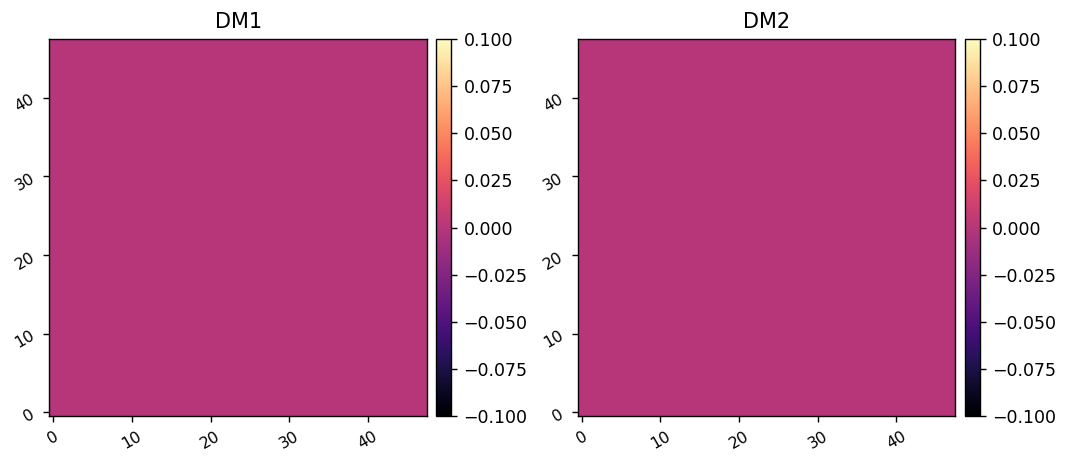

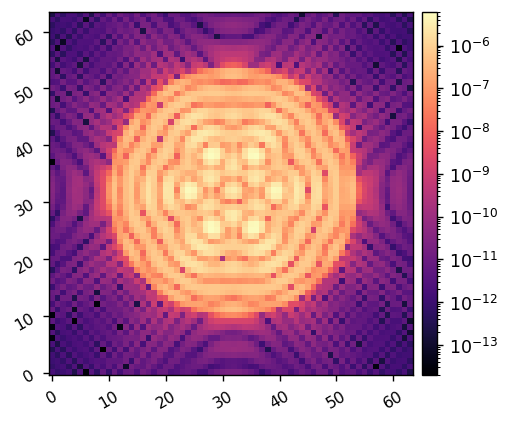

In [38]:
reload(cgi)
hlc = cgi.CGI(cgi_mode='hlc', 
              use_fpm=True,
              use_pupil_defocus=False, 
              polaxis=0,
#               use_opds=True,
#               dm1_ref=dm1_flat, dm2_ref=dm2_flat,
             )
hlc.show_dms()

npsf = hlc.npsf
Nact = hlc.Nact

ref_psf = hlc.snap()

misc.myimshow(ref_psf, lognorm=True)

# Create the dark-hole mask

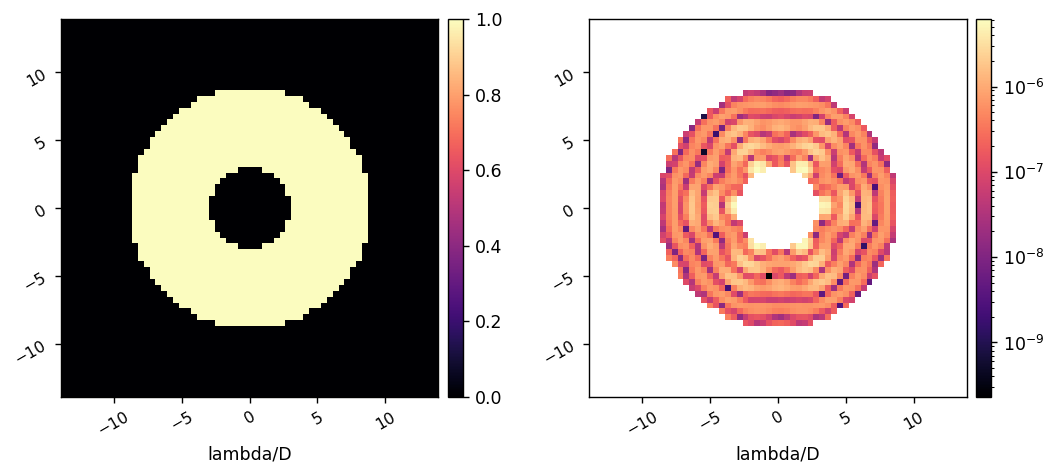

In [39]:
xfp = np.linspace(-0.5, 0.5, npsf) * npsf * hlc.psf_pixelscale_lamD
xf,yf = np.meshgrid(xfp,xfp)

edge = 2
iwa = 3
owa = 9
rot = 0

# Create the mask that is used to select which region to make dark.
dh_params = {
    'inner_radius' : iwa,
    'outer_radius' : owa,
    'edge_position' : edge,
#     'direction' : '+x',
    'rotation':rot,
    'full':True
}
dh_mask = utils.create_annular_focal_plane_mask(xf, yf, dh_params)

nmask = dh_mask.sum()

misc.myimshow2(dh_mask, ref_psf*dh_mask,  
               pxscl1=hlc.psf_pixelscale_lamD, pxscl2=hlc.psf_pixelscale_lamD,
               lognorm2=True)

In [40]:
dh_mask.shape

(64, 64)

In [41]:
nmask

1148

In [42]:
reload(efc)

epsilon = 1e-9 # poke amplitudes (DM surface)
jac = efc.build_jacobian(hlc, epsilon, dh_mask.flatten(), display=False)

Building Jacobian.
	Calculated response for mode 1/2304. Elapsed time=0.005 sec.
	Calculated response for mode 2/2304. Elapsed time=0.005 sec.
	Calculated response for mode 3/2304. Elapsed time=0.005 sec.
	Calculated response for mode 4/2304. Elapsed time=0.005 sec.
	Calculated response for mode 5/2304. Elapsed time=0.005 sec.
	Calculated response for mode 6/2304. Elapsed time=0.005 sec.
	Calculated response for mode 7/2304. Elapsed time=0.005 sec.
	Calculated response for mode 8/2304. Elapsed time=0.005 sec.
	Calculated response for mode 9/2304. Elapsed time=0.005 sec.
	Calculated response for mode 10/2304. Elapsed time=0.005 sec.
	Calculated response for mode 11/2304. Elapsed time=0.005 sec.
	Calculated response for mode 12/2304. Elapsed time=0.005 sec.
	Calculated response for mode 13/2304. Elapsed time=0.005 sec.
	Calculated response for mode 14/2304. Elapsed time=0.006 sec.
	Calculated response for mode 15/2304. Elapsed time=0.006 sec.
	Calculated response for mode 16/2304. Elapse

	Calculated response for mode 130/2304. Elapsed time=50.079 sec.
	Calculated response for mode 131/2304. Elapsed time=50.079 sec.
	Calculated response for mode 132/2304. Elapsed time=50.079 sec.
	Calculated response for mode 133/2304. Elapsed time=50.079 sec.
	Calculated response for mode 134/2304. Elapsed time=50.079 sec.
	Calculated response for mode 135/2304. Elapsed time=50.079 sec.
	Calculated response for mode 136/2304. Elapsed time=50.079 sec.
	Calculated response for mode 137/2304. Elapsed time=50.079 sec.
	Calculated response for mode 138/2304. Elapsed time=50.079 sec.
	Calculated response for mode 139/2304. Elapsed time=50.079 sec.
	Calculated response for mode 140/2304. Elapsed time=50.079 sec.
	Calculated response for mode 141/2304. Elapsed time=50.079 sec.
	Calculated response for mode 142/2304. Elapsed time=50.079 sec.
	Calculated response for mode 143/2304. Elapsed time=50.079 sec.
	Calculated response for mode 144/2304. Elapsed time=50.079 sec.
	Calculated response for 

	Calculated response for mode 256/2304. Elapsed time=121.062 sec.
	Calculated response for mode 257/2304. Elapsed time=122.262 sec.
	Calculated response for mode 258/2304. Elapsed time=123.464 sec.
	Calculated response for mode 259/2304. Elapsed time=124.666 sec.
	Calculated response for mode 260/2304. Elapsed time=125.865 sec.
	Calculated response for mode 261/2304. Elapsed time=127.063 sec.
	Calculated response for mode 262/2304. Elapsed time=128.267 sec.
	Calculated response for mode 263/2304. Elapsed time=129.467 sec.
	Calculated response for mode 264/2304. Elapsed time=130.658 sec.
	Calculated response for mode 265/2304. Elapsed time=131.859 sec.
	Calculated response for mode 266/2304. Elapsed time=133.062 sec.
	Calculated response for mode 267/2304. Elapsed time=134.252 sec.
	Calculated response for mode 268/2304. Elapsed time=135.448 sec.
	Calculated response for mode 269/2304. Elapsed time=136.648 sec.
	Calculated response for mode 270/2304. Elapsed time=137.837 sec.
	Calculate

	Calculated response for mode 391/2304. Elapsed time=229.016 sec.
	Calculated response for mode 392/2304. Elapsed time=230.194 sec.
	Calculated response for mode 393/2304. Elapsed time=231.382 sec.
	Calculated response for mode 394/2304. Elapsed time=232.565 sec.
	Calculated response for mode 395/2304. Elapsed time=233.860 sec.
	Calculated response for mode 396/2304. Elapsed time=235.038 sec.
	Calculated response for mode 397/2304. Elapsed time=236.217 sec.
	Calculated response for mode 398/2304. Elapsed time=237.403 sec.
	Calculated response for mode 399/2304. Elapsed time=238.581 sec.
	Calculated response for mode 400/2304. Elapsed time=239.905 sec.
	Calculated response for mode 401/2304. Elapsed time=241.089 sec.
	Calculated response for mode 402/2304. Elapsed time=242.272 sec.
	Calculated response for mode 403/2304. Elapsed time=243.453 sec.
	Calculated response for mode 404/2304. Elapsed time=244.630 sec.
	Calculated response for mode 405/2304. Elapsed time=245.819 sec.
	Calculate

	Calculated response for mode 516/2304. Elapsed time=349.464 sec.
	Calculated response for mode 517/2304. Elapsed time=350.808 sec.
	Calculated response for mode 518/2304. Elapsed time=351.940 sec.
	Calculated response for mode 519/2304. Elapsed time=353.074 sec.
	Calculated response for mode 520/2304. Elapsed time=354.204 sec.
	Calculated response for mode 521/2304. Elapsed time=355.336 sec.
	Calculated response for mode 522/2304. Elapsed time=356.472 sec.
	Calculated response for mode 523/2304. Elapsed time=357.603 sec.
	Calculated response for mode 524/2304. Elapsed time=358.733 sec.
	Calculated response for mode 525/2304. Elapsed time=358.733 sec.
	Calculated response for mode 526/2304. Elapsed time=358.733 sec.
	Calculated response for mode 527/2304. Elapsed time=358.733 sec.
	Calculated response for mode 528/2304. Elapsed time=358.733 sec.
	Calculated response for mode 529/2304. Elapsed time=358.734 sec.
	Calculated response for mode 530/2304. Elapsed time=358.734 sec.
	Calculate

	Calculated response for mode 641/2304. Elapsed time=467.845 sec.
	Calculated response for mode 642/2304. Elapsed time=468.982 sec.
	Calculated response for mode 643/2304. Elapsed time=470.120 sec.
	Calculated response for mode 644/2304. Elapsed time=471.255 sec.
	Calculated response for mode 645/2304. Elapsed time=472.396 sec.
	Calculated response for mode 646/2304. Elapsed time=473.540 sec.
	Calculated response for mode 647/2304. Elapsed time=474.677 sec.
	Calculated response for mode 648/2304. Elapsed time=475.817 sec.
	Calculated response for mode 649/2304. Elapsed time=476.957 sec.
	Calculated response for mode 650/2304. Elapsed time=478.094 sec.
	Calculated response for mode 651/2304. Elapsed time=479.256 sec.
	Calculated response for mode 652/2304. Elapsed time=480.398 sec.
	Calculated response for mode 653/2304. Elapsed time=481.545 sec.
	Calculated response for mode 654/2304. Elapsed time=482.682 sec.
	Calculated response for mode 655/2304. Elapsed time=483.822 sec.
	Calculate

	Calculated response for mode 766/2304. Elapsed time=606.165 sec.
	Calculated response for mode 767/2304. Elapsed time=606.165 sec.
	Calculated response for mode 768/2304. Elapsed time=606.166 sec.
	Calculated response for mode 769/2304. Elapsed time=606.166 sec.
	Calculated response for mode 770/2304. Elapsed time=607.334 sec.
	Calculated response for mode 771/2304. Elapsed time=608.509 sec.
	Calculated response for mode 772/2304. Elapsed time=609.685 sec.
	Calculated response for mode 773/2304. Elapsed time=610.861 sec.
	Calculated response for mode 774/2304. Elapsed time=612.029 sec.
	Calculated response for mode 775/2304. Elapsed time=613.220 sec.
	Calculated response for mode 776/2304. Elapsed time=614.411 sec.
	Calculated response for mode 777/2304. Elapsed time=615.594 sec.
	Calculated response for mode 778/2304. Elapsed time=616.789 sec.
	Calculated response for mode 779/2304. Elapsed time=617.972 sec.
	Calculated response for mode 780/2304. Elapsed time=619.161 sec.
	Calculate

	Calculated response for mode 891/2304. Elapsed time=745.036 sec.
	Calculated response for mode 892/2304. Elapsed time=746.177 sec.
	Calculated response for mode 893/2304. Elapsed time=747.323 sec.
	Calculated response for mode 894/2304. Elapsed time=748.511 sec.
	Calculated response for mode 895/2304. Elapsed time=749.681 sec.
	Calculated response for mode 896/2304. Elapsed time=750.866 sec.
	Calculated response for mode 897/2304. Elapsed time=752.037 sec.
	Calculated response for mode 898/2304. Elapsed time=753.231 sec.
	Calculated response for mode 899/2304. Elapsed time=754.406 sec.
	Calculated response for mode 900/2304. Elapsed time=755.595 sec.
	Calculated response for mode 901/2304. Elapsed time=756.770 sec.
	Calculated response for mode 902/2304. Elapsed time=757.957 sec.
	Calculated response for mode 903/2304. Elapsed time=759.130 sec.
	Calculated response for mode 904/2304. Elapsed time=760.314 sec.
	Calculated response for mode 905/2304. Elapsed time=761.497 sec.
	Calculate

	Calculated response for mode 1015/2304. Elapsed time=886.521 sec.
	Calculated response for mode 1016/2304. Elapsed time=887.701 sec.
	Calculated response for mode 1017/2304. Elapsed time=888.883 sec.
	Calculated response for mode 1018/2304. Elapsed time=890.073 sec.
	Calculated response for mode 1019/2304. Elapsed time=891.273 sec.
	Calculated response for mode 1020/2304. Elapsed time=892.490 sec.
	Calculated response for mode 1021/2304. Elapsed time=893.686 sec.
	Calculated response for mode 1022/2304. Elapsed time=894.861 sec.
	Calculated response for mode 1023/2304. Elapsed time=896.043 sec.
	Calculated response for mode 1024/2304. Elapsed time=897.223 sec.
	Calculated response for mode 1025/2304. Elapsed time=898.404 sec.
	Calculated response for mode 1026/2304. Elapsed time=899.608 sec.
	Calculated response for mode 1027/2304. Elapsed time=900.792 sec.
	Calculated response for mode 1028/2304. Elapsed time=901.980 sec.
	Calculated response for mode 1029/2304. Elapsed time=903.161 

	Calculated response for mode 1137/2304. Elapsed time=1036.564 sec.
	Calculated response for mode 1138/2304. Elapsed time=1037.729 sec.
	Calculated response for mode 1139/2304. Elapsed time=1038.915 sec.
	Calculated response for mode 1140/2304. Elapsed time=1040.108 sec.
	Calculated response for mode 1141/2304. Elapsed time=1041.288 sec.
	Calculated response for mode 1142/2304. Elapsed time=1042.604 sec.
	Calculated response for mode 1143/2304. Elapsed time=1043.793 sec.
	Calculated response for mode 1144/2304. Elapsed time=1044.974 sec.
	Calculated response for mode 1145/2304. Elapsed time=1046.154 sec.
	Calculated response for mode 1146/2304. Elapsed time=1047.340 sec.
	Calculated response for mode 1147/2304. Elapsed time=1048.530 sec.
	Calculated response for mode 1148/2304. Elapsed time=1049.715 sec.
	Calculated response for mode 1149/2304. Elapsed time=1050.904 sec.
	Calculated response for mode 1150/2304. Elapsed time=1052.092 sec.
	Calculated response for mode 1151/2304. Elapsed

	Calculated response for mode 1258/2304. Elapsed time=1181.681 sec.
	Calculated response for mode 1259/2304. Elapsed time=1182.871 sec.
	Calculated response for mode 1260/2304. Elapsed time=1184.064 sec.
	Calculated response for mode 1261/2304. Elapsed time=1185.244 sec.
	Calculated response for mode 1262/2304. Elapsed time=1186.431 sec.
	Calculated response for mode 1263/2304. Elapsed time=1187.614 sec.
	Calculated response for mode 1264/2304. Elapsed time=1188.802 sec.
	Calculated response for mode 1265/2304. Elapsed time=1190.045 sec.
	Calculated response for mode 1266/2304. Elapsed time=1191.236 sec.
	Calculated response for mode 1267/2304. Elapsed time=1192.419 sec.
	Calculated response for mode 1268/2304. Elapsed time=1193.594 sec.
	Calculated response for mode 1269/2304. Elapsed time=1194.772 sec.
	Calculated response for mode 1270/2304. Elapsed time=1196.178 sec.
	Calculated response for mode 1271/2304. Elapsed time=1197.358 sec.
	Calculated response for mode 1272/2304. Elapsed

	Calculated response for mode 1379/2304. Elapsed time=1322.019 sec.
	Calculated response for mode 1380/2304. Elapsed time=1323.228 sec.
	Calculated response for mode 1381/2304. Elapsed time=1324.452 sec.
	Calculated response for mode 1382/2304. Elapsed time=1325.648 sec.
	Calculated response for mode 1383/2304. Elapsed time=1326.827 sec.
	Calculated response for mode 1384/2304. Elapsed time=1328.010 sec.
	Calculated response for mode 1385/2304. Elapsed time=1329.186 sec.
	Calculated response for mode 1386/2304. Elapsed time=1330.370 sec.
	Calculated response for mode 1387/2304. Elapsed time=1331.541 sec.
	Calculated response for mode 1388/2304. Elapsed time=1332.734 sec.
	Calculated response for mode 1389/2304. Elapsed time=1333.913 sec.
	Calculated response for mode 1390/2304. Elapsed time=1335.095 sec.
	Calculated response for mode 1391/2304. Elapsed time=1336.268 sec.
	Calculated response for mode 1392/2304. Elapsed time=1336.268 sec.
	Calculated response for mode 1393/2304. Elapsed

	Calculated response for mode 1500/2304. Elapsed time=1458.742 sec.
	Calculated response for mode 1501/2304. Elapsed time=1459.931 sec.
	Calculated response for mode 1502/2304. Elapsed time=1461.138 sec.
	Calculated response for mode 1503/2304. Elapsed time=1462.342 sec.
	Calculated response for mode 1504/2304. Elapsed time=1463.522 sec.
	Calculated response for mode 1505/2304. Elapsed time=1464.715 sec.
	Calculated response for mode 1506/2304. Elapsed time=1465.905 sec.
	Calculated response for mode 1507/2304. Elapsed time=1467.089 sec.
	Calculated response for mode 1508/2304. Elapsed time=1468.279 sec.
	Calculated response for mode 1509/2304. Elapsed time=1469.464 sec.
	Calculated response for mode 1510/2304. Elapsed time=1470.646 sec.
	Calculated response for mode 1511/2304. Elapsed time=1471.828 sec.
	Calculated response for mode 1512/2304. Elapsed time=1473.006 sec.
	Calculated response for mode 1513/2304. Elapsed time=1474.185 sec.
	Calculated response for mode 1514/2304. Elapsed

	Calculated response for mode 1621/2304. Elapsed time=1591.913 sec.
	Calculated response for mode 1622/2304. Elapsed time=1593.100 sec.
	Calculated response for mode 1623/2304. Elapsed time=1594.291 sec.
	Calculated response for mode 1624/2304. Elapsed time=1595.483 sec.
	Calculated response for mode 1625/2304. Elapsed time=1596.681 sec.
	Calculated response for mode 1626/2304. Elapsed time=1597.861 sec.
	Calculated response for mode 1627/2304. Elapsed time=1599.054 sec.
	Calculated response for mode 1628/2304. Elapsed time=1600.252 sec.
	Calculated response for mode 1629/2304. Elapsed time=1601.451 sec.
	Calculated response for mode 1630/2304. Elapsed time=1602.637 sec.
	Calculated response for mode 1631/2304. Elapsed time=1602.638 sec.
	Calculated response for mode 1632/2304. Elapsed time=1602.638 sec.
	Calculated response for mode 1633/2304. Elapsed time=1602.638 sec.
	Calculated response for mode 1634/2304. Elapsed time=1602.638 sec.
	Calculated response for mode 1635/2304. Elapsed

	Calculated response for mode 1742/2304. Elapsed time=1710.725 sec.
	Calculated response for mode 1743/2304. Elapsed time=1711.912 sec.
	Calculated response for mode 1744/2304. Elapsed time=1713.106 sec.
	Calculated response for mode 1745/2304. Elapsed time=1714.298 sec.
	Calculated response for mode 1746/2304. Elapsed time=1715.483 sec.
	Calculated response for mode 1747/2304. Elapsed time=1716.667 sec.
	Calculated response for mode 1748/2304. Elapsed time=1717.851 sec.
	Calculated response for mode 1749/2304. Elapsed time=1719.047 sec.
	Calculated response for mode 1750/2304. Elapsed time=1720.245 sec.
	Calculated response for mode 1751/2304. Elapsed time=1721.439 sec.
	Calculated response for mode 1752/2304. Elapsed time=1722.632 sec.
	Calculated response for mode 1753/2304. Elapsed time=1723.821 sec.
	Calculated response for mode 1754/2304. Elapsed time=1725.010 sec.
	Calculated response for mode 1755/2304. Elapsed time=1726.198 sec.
	Calculated response for mode 1756/2304. Elapsed

	Calculated response for mode 1863/2304. Elapsed time=1834.178 sec.
	Calculated response for mode 1864/2304. Elapsed time=1835.365 sec.
	Calculated response for mode 1865/2304. Elapsed time=1836.546 sec.
	Calculated response for mode 1866/2304. Elapsed time=1837.725 sec.
	Calculated response for mode 1867/2304. Elapsed time=1838.912 sec.
	Calculated response for mode 1868/2304. Elapsed time=1838.912 sec.
	Calculated response for mode 1869/2304. Elapsed time=1838.912 sec.
	Calculated response for mode 1870/2304. Elapsed time=1838.912 sec.
	Calculated response for mode 1871/2304. Elapsed time=1838.912 sec.
	Calculated response for mode 1872/2304. Elapsed time=1838.912 sec.
	Calculated response for mode 1873/2304. Elapsed time=1838.912 sec.
	Calculated response for mode 1874/2304. Elapsed time=1838.912 sec.
	Calculated response for mode 1875/2304. Elapsed time=1838.912 sec.
	Calculated response for mode 1876/2304. Elapsed time=1838.912 sec.
	Calculated response for mode 1877/2304. Elapsed

	Calculated response for mode 1984/2304. Elapsed time=1931.032 sec.
	Calculated response for mode 1985/2304. Elapsed time=1932.220 sec.
	Calculated response for mode 1986/2304. Elapsed time=1933.403 sec.
	Calculated response for mode 1987/2304. Elapsed time=1934.582 sec.
	Calculated response for mode 1988/2304. Elapsed time=1935.774 sec.
	Calculated response for mode 1989/2304. Elapsed time=1936.955 sec.
	Calculated response for mode 1990/2304. Elapsed time=1938.126 sec.
	Calculated response for mode 1991/2304. Elapsed time=1939.309 sec.
	Calculated response for mode 1992/2304. Elapsed time=1940.488 sec.
	Calculated response for mode 1993/2304. Elapsed time=1941.651 sec.
	Calculated response for mode 1994/2304. Elapsed time=1942.826 sec.
	Calculated response for mode 1995/2304. Elapsed time=1943.991 sec.
	Calculated response for mode 1996/2304. Elapsed time=1945.165 sec.
	Calculated response for mode 1997/2304. Elapsed time=1946.328 sec.
	Calculated response for mode 1998/2304. Elapsed

	Calculated response for mode 2125/2304. Elapsed time=2025.980 sec.
	Calculated response for mode 2126/2304. Elapsed time=2027.112 sec.
	Calculated response for mode 2127/2304. Elapsed time=2028.242 sec.
	Calculated response for mode 2128/2304. Elapsed time=2029.375 sec.
	Calculated response for mode 2129/2304. Elapsed time=2030.709 sec.
	Calculated response for mode 2130/2304. Elapsed time=2031.841 sec.
	Calculated response for mode 2131/2304. Elapsed time=2032.967 sec.
	Calculated response for mode 2132/2304. Elapsed time=2034.098 sec.
	Calculated response for mode 2133/2304. Elapsed time=2035.352 sec.
	Calculated response for mode 2134/2304. Elapsed time=2036.481 sec.
	Calculated response for mode 2135/2304. Elapsed time=2037.612 sec.
	Calculated response for mode 2136/2304. Elapsed time=2038.741 sec.
	Calculated response for mode 2137/2304. Elapsed time=2039.875 sec.
	Calculated response for mode 2138/2304. Elapsed time=2041.006 sec.
	Calculated response for mode 2139/2304. Elapsed

	Calculated response for mode 2278/2304. Elapsed time=2095.965 sec.
	Calculated response for mode 2279/2304. Elapsed time=2097.131 sec.
	Calculated response for mode 2280/2304. Elapsed time=2098.313 sec.
	Calculated response for mode 2281/2304. Elapsed time=2099.746 sec.
	Calculated response for mode 2282/2304. Elapsed time=2100.932 sec.
	Calculated response for mode 2283/2304. Elapsed time=2102.109 sec.
	Calculated response for mode 2284/2304. Elapsed time=2102.110 sec.
	Calculated response for mode 2285/2304. Elapsed time=2102.110 sec.
	Calculated response for mode 2286/2304. Elapsed time=2102.110 sec.
	Calculated response for mode 2287/2304. Elapsed time=2102.110 sec.
	Calculated response for mode 2288/2304. Elapsed time=2102.110 sec.
	Calculated response for mode 2289/2304. Elapsed time=2102.110 sec.
	Calculated response for mode 2290/2304. Elapsed time=2102.110 sec.
	Calculated response for mode 2291/2304. Elapsed time=2102.110 sec.
	Calculated response for mode 2292/2304. Elapsed

In [43]:
jac_dir = Path('/groups/douglase/kians-data-files/roman-cgi-iefc-data/jacobians')
# fname = 'hlc_39_opds_flatmaps_2dm'
fname = 'hlc_2dm'

In [44]:
misc.save_pickle(jac_dir/fname, jac, quiet=False)

Saved data to:  /groups/douglase/kians-data-files/roman-cgi-iefc-data/jacobians/hlc_2dm


In [45]:
jac = misc.load_pickle(jac_dir/fname)
jac.shape, jac[:,:Nact**2].shape, jac[:,Nact**2:].shape

((2296, 4608), (2296, 2304), (2296, 2304))

# Generate probes and test PWP
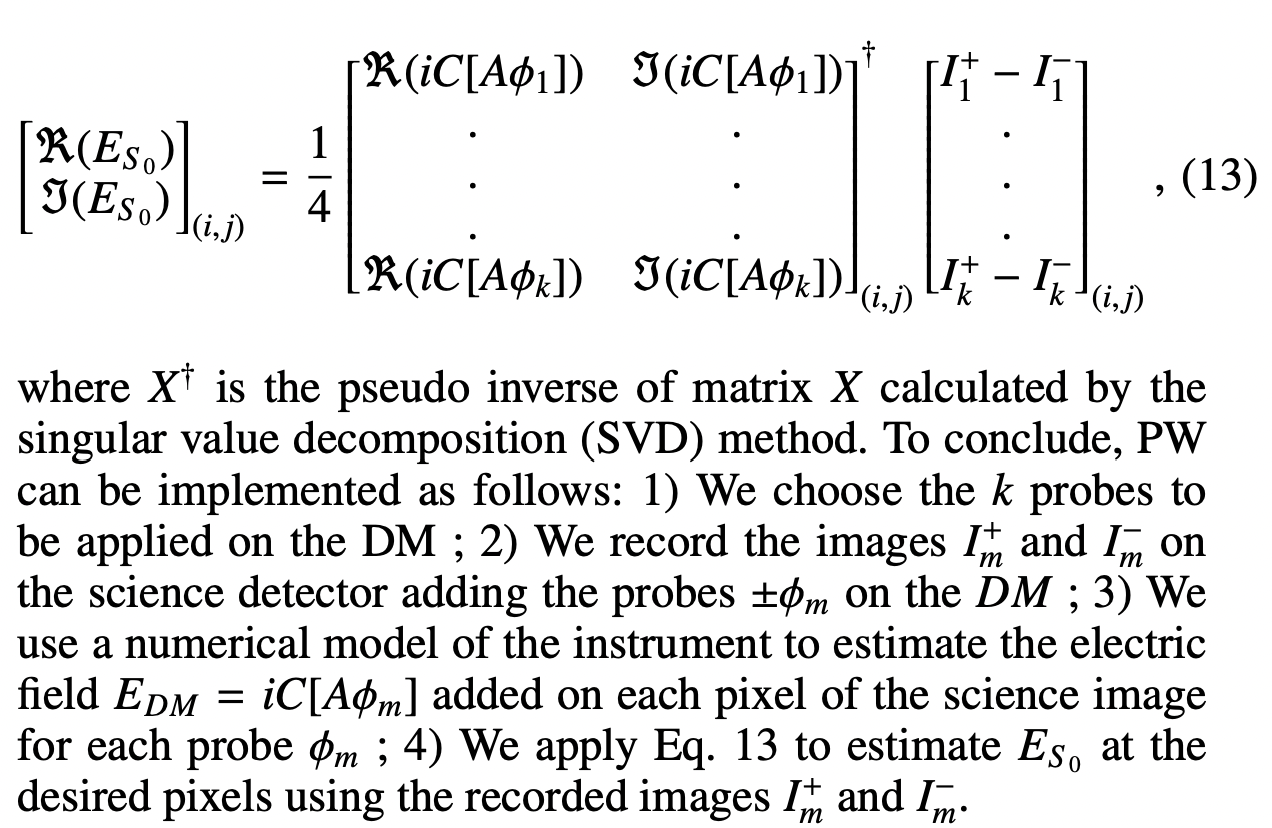

Generating probe with amplitude=1.438e-08, radius=12.0, phase=0.000, offset=(8.0,8.0), with discontinuity along x axis.
Generating probe with amplitude=1.438e-08, radius=12.0, phase=1.571, offset=(8.0,8.0), with discontinuity along y axis.


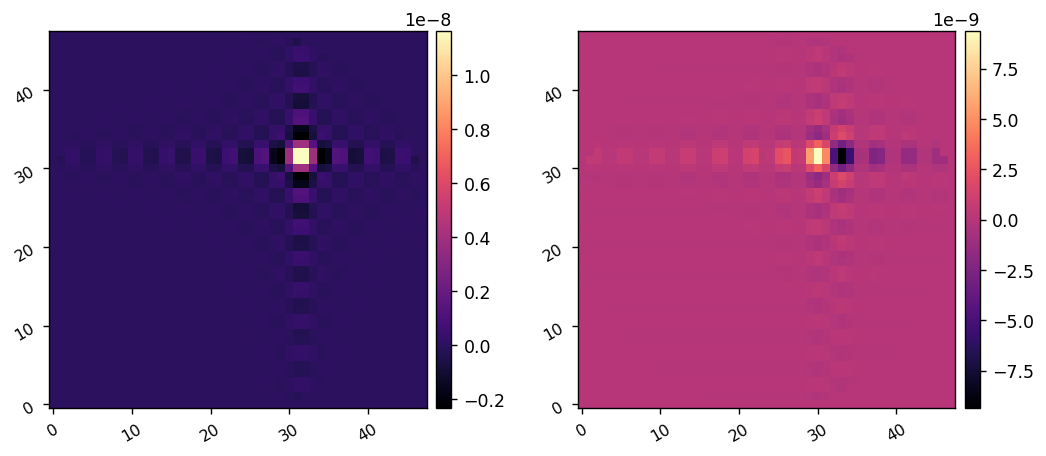

In [46]:
reload(efc)

Npairs = 2
probe_amp = 0.025*hlc.wavelength_c.value
probe_radius = 12
probe_offset = (8,8)

probes = efc.create_sinc_probes(Npairs, Nact, hlc.dm_mask, probe_amp, probe_radius, probe_offset, display=True)

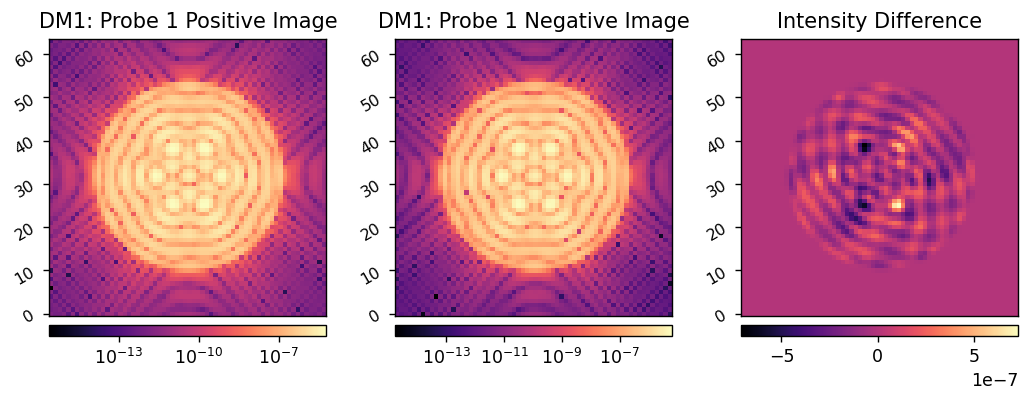

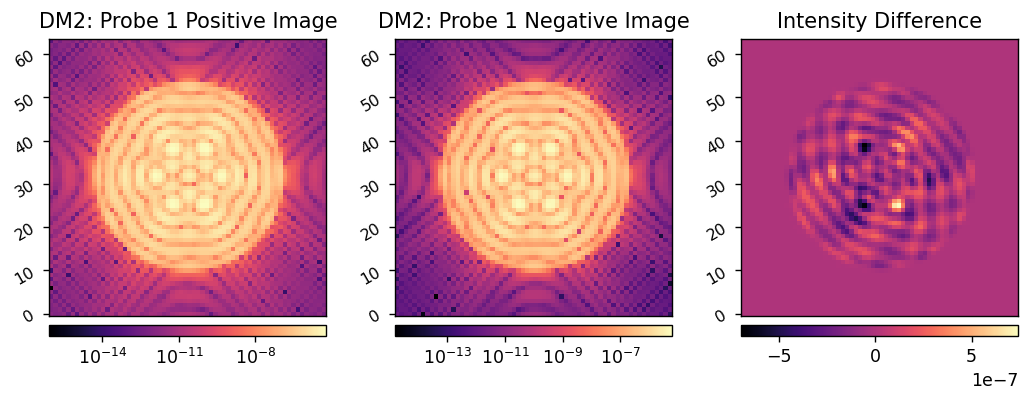

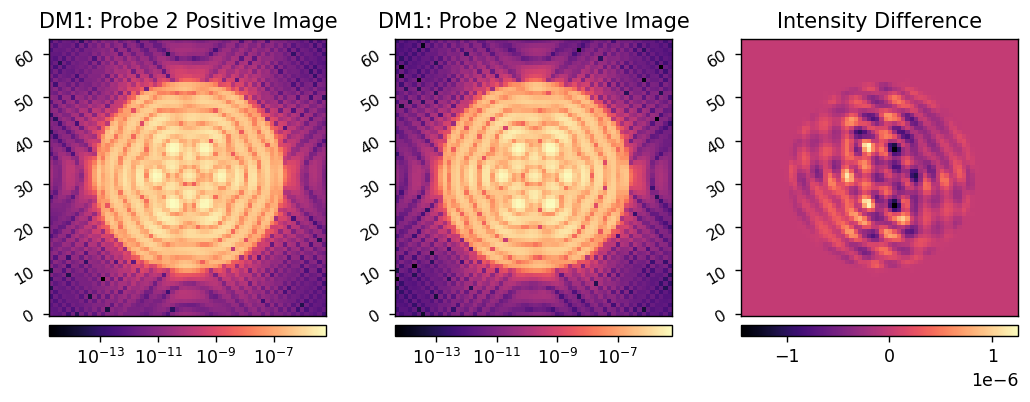

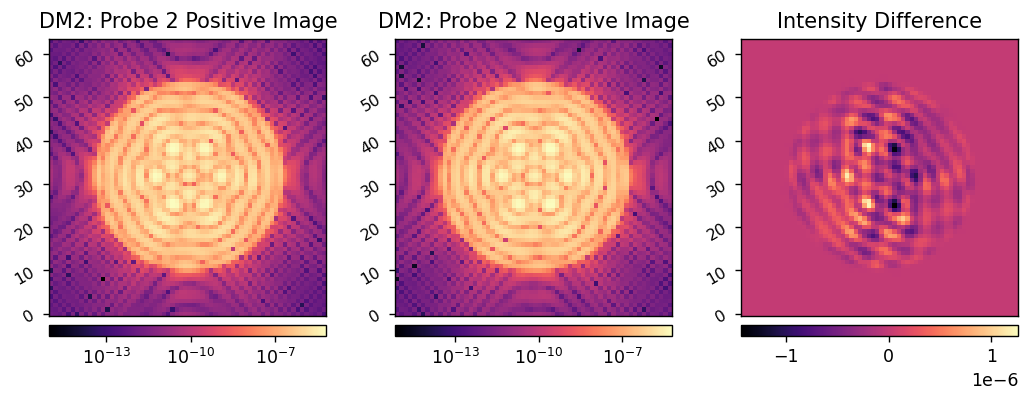

(2, 1148)


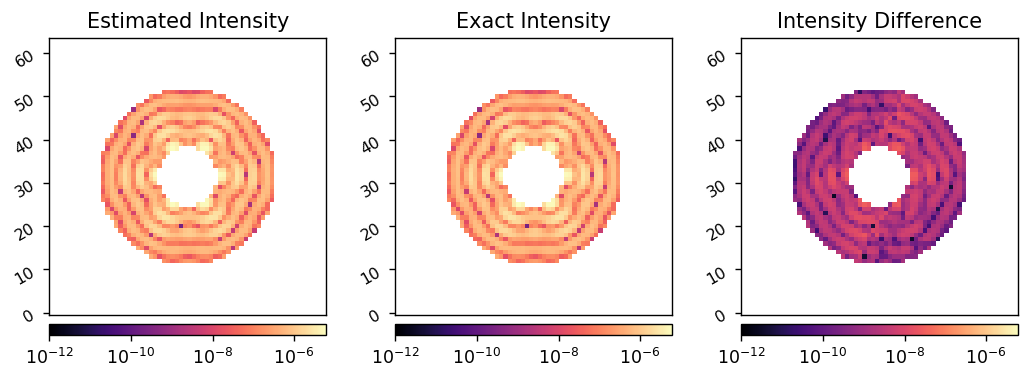

(6.3199292988588e-07, 3.6647067272650257e-09)

In [49]:
reload(efc)

hlc.reset_dms()
E_est = efc.run_pwp(hlc, probes, jac, dh_mask, reg_cond=1e-3, use_noise=False, display=True)
diff = abs(ref_psf*dh_mask - np.abs(E_est)**2)

vmin = 1e-12
vmax = ref_psf.max()
misc.myimshow3(np.abs(E_est)**2, 
               ref_psf*dh_mask, diff,
               'Estimated Intensity', 'Exact Intensity', 'Intensity Difference',
               lognorm1=True, lognorm2=True, lognorm3=True,
               vmin1=vmin, vmin2=vmin, vmin3=vmin,
               vmax1=vmax, vmax2=vmax, vmax3=vmax,
              )


np.mean(ref_psf[dh_mask]), np.mean(diff[dh_mask])

# Invert the Jacobian to get the control matrix

In [50]:
reload(efc)
rcond = 5e-2

efc_matrix = utils.TikhonovInverse(jac, rcond)
efc_matrix.shape

(4608, 2296)

In [56]:
import hcipy
rcond = 5e-3
efc_matrix = hcipy.inverse_tikhonov(jac, rcond)
efc_matrix.shape


(4608, 2296)

# Run EFC with perfect model

Beginning closed-loop EFC simulation.


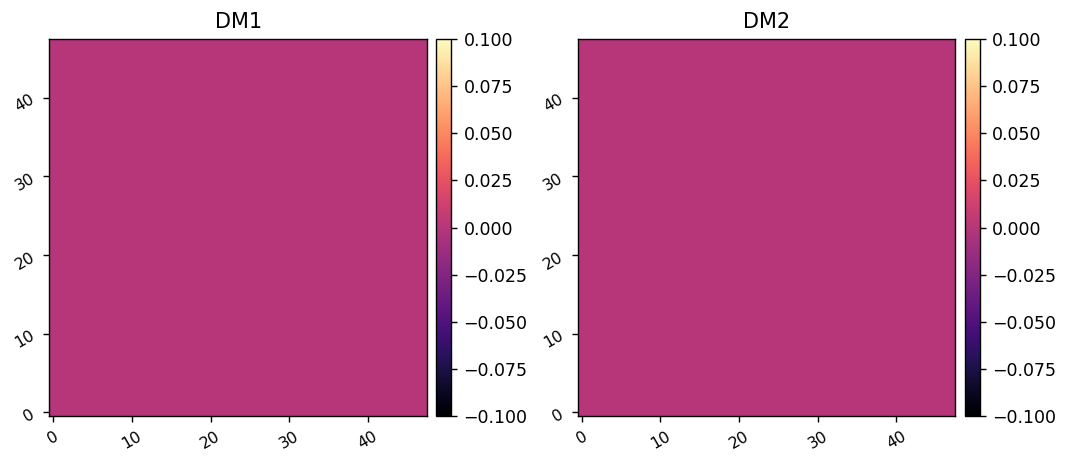

	Running iteration 1/20.


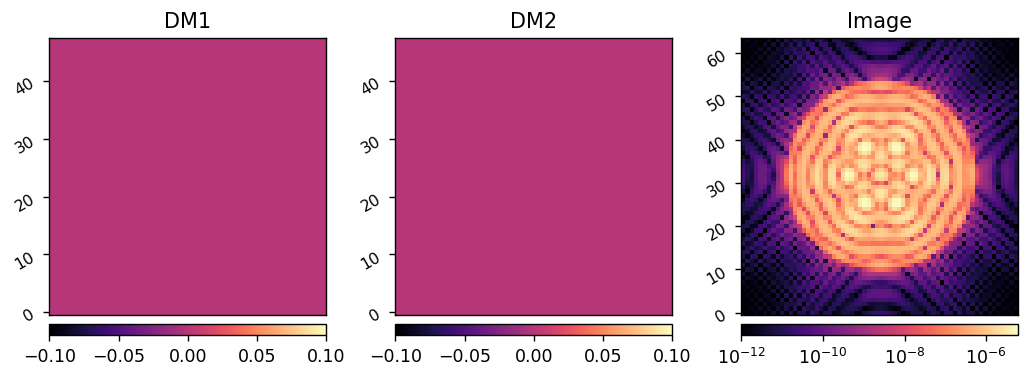

	Running iteration 2/20.


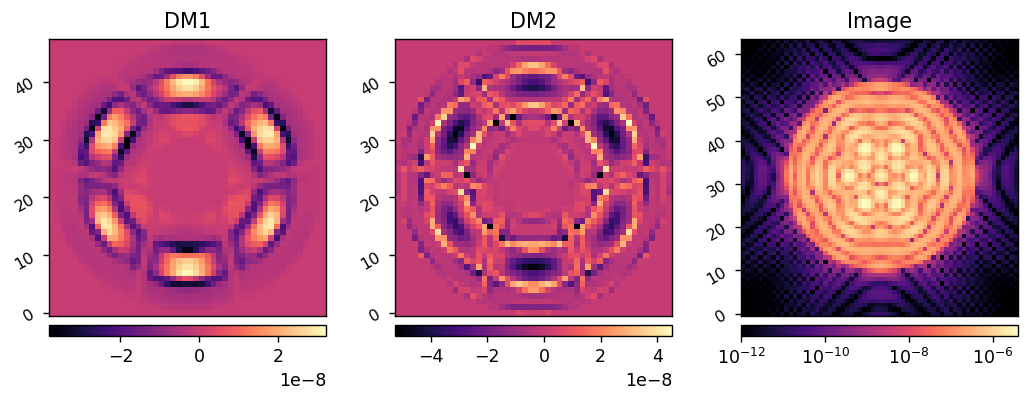

	Running iteration 3/20.


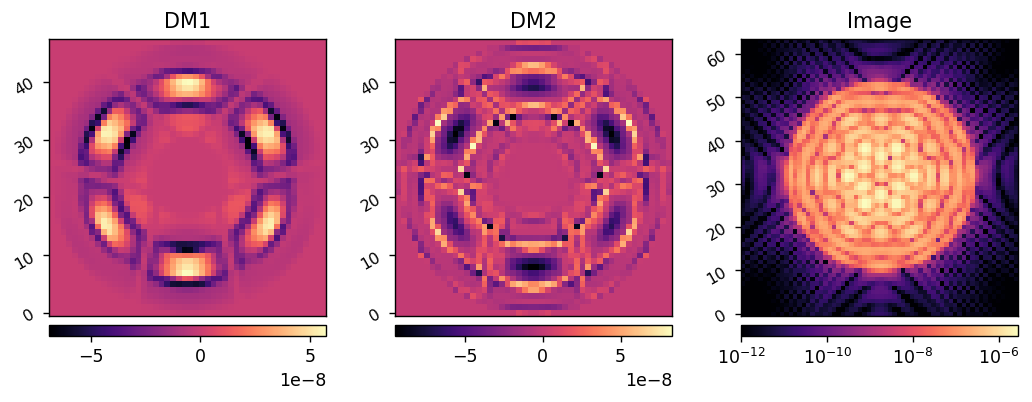

	Running iteration 4/20.


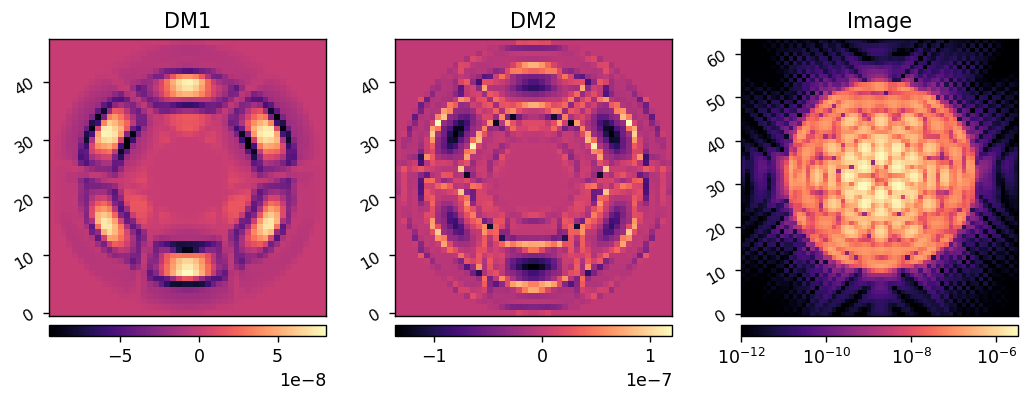

	Running iteration 5/20.


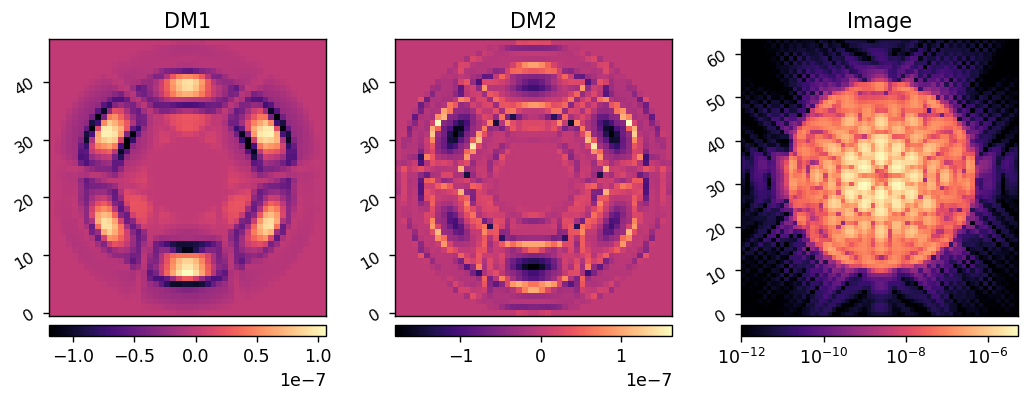

	Running iteration 6/20.


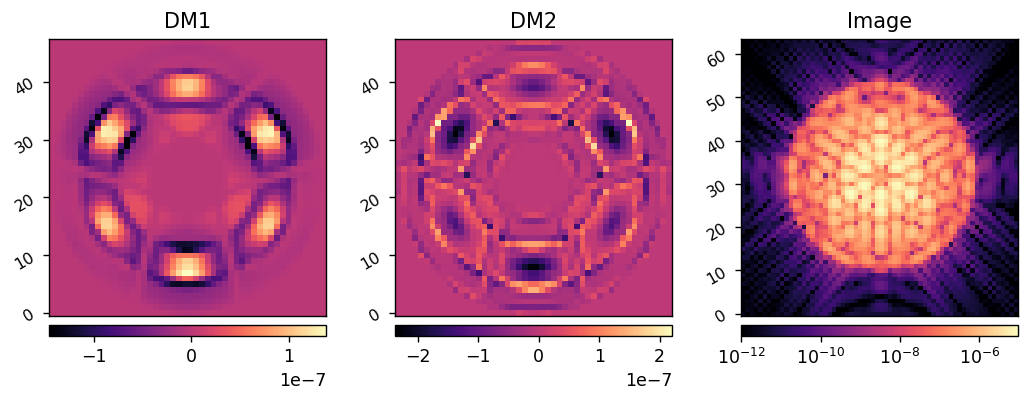

	Running iteration 7/20.


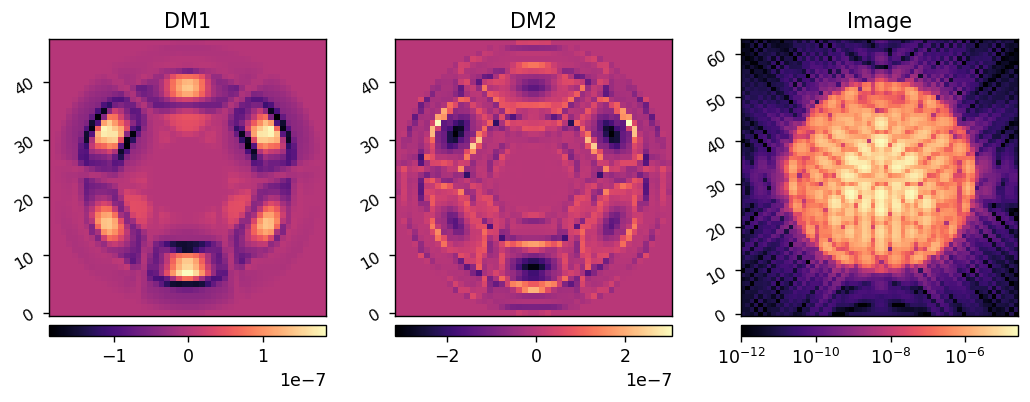

	Running iteration 8/20.


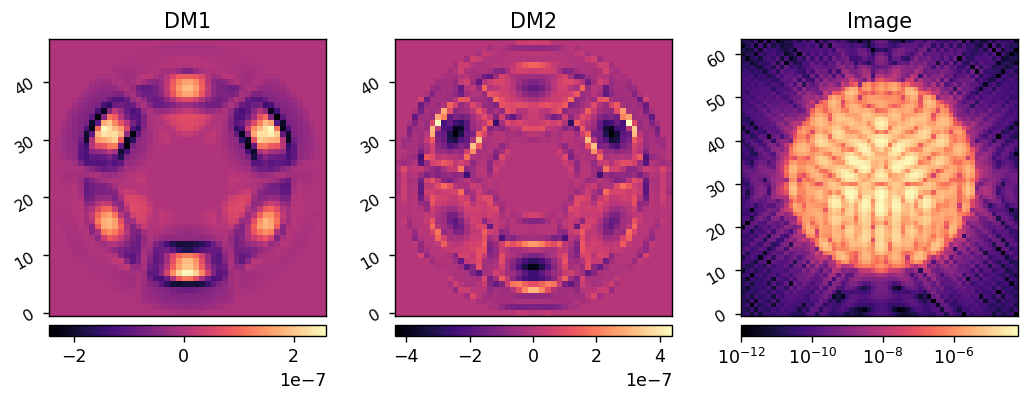

	Running iteration 9/20.


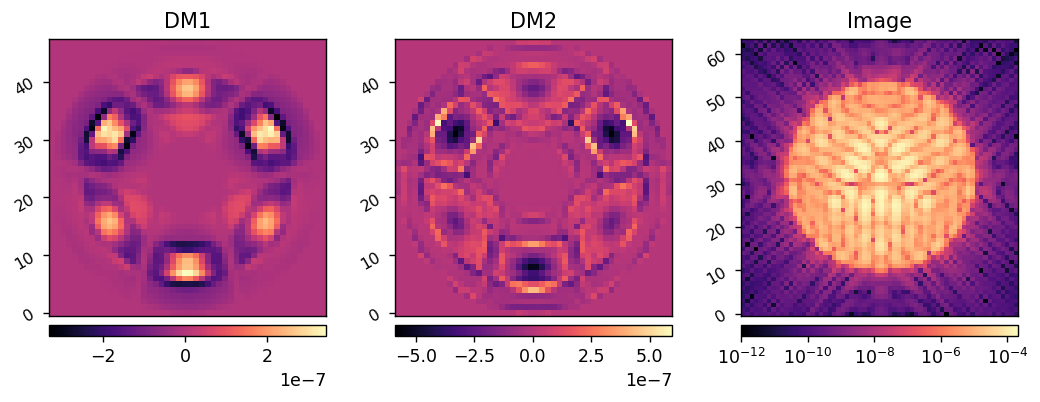

	Running iteration 10/20.


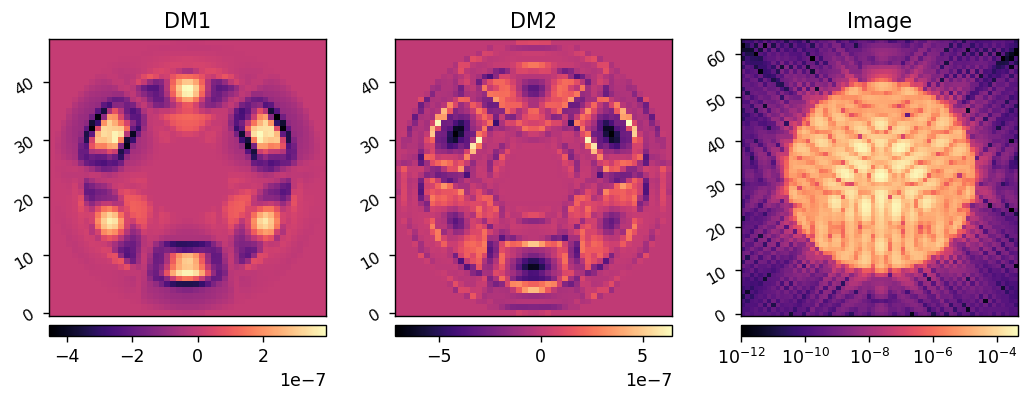

	Running iteration 11/20.


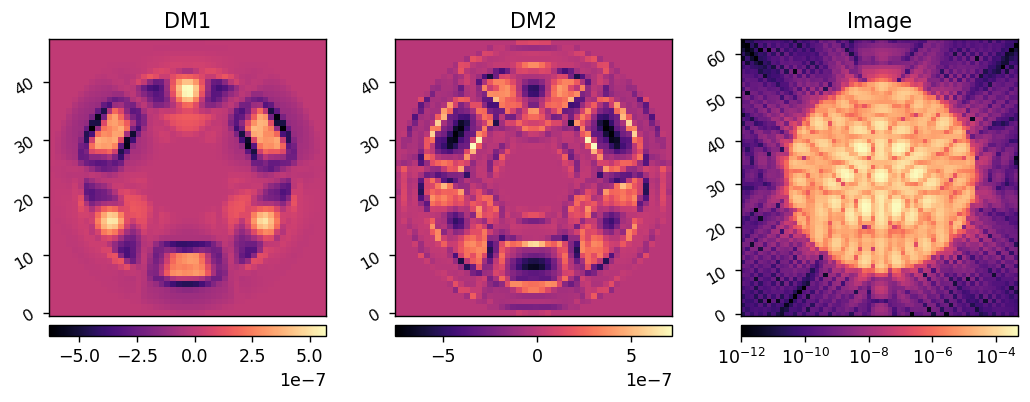

	Running iteration 12/20.


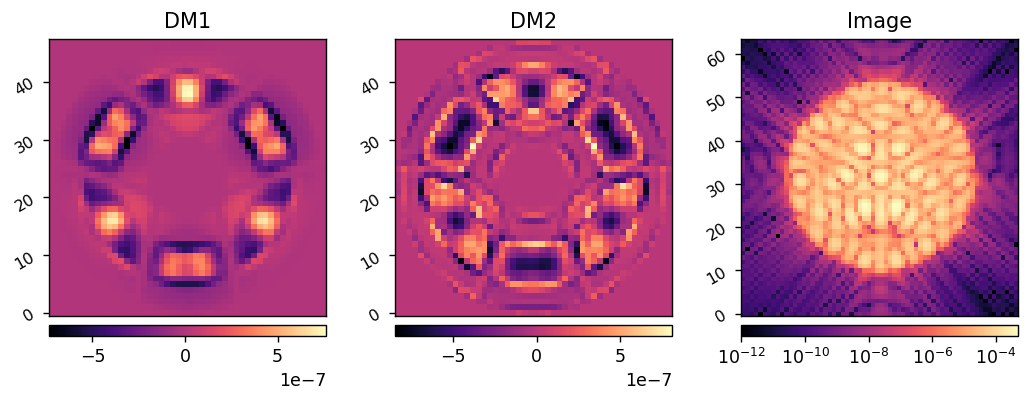

	Running iteration 13/20.


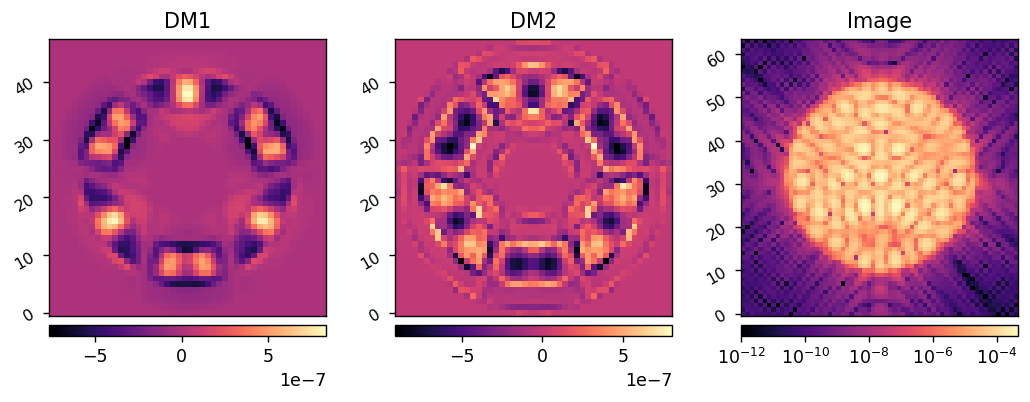

	Running iteration 14/20.


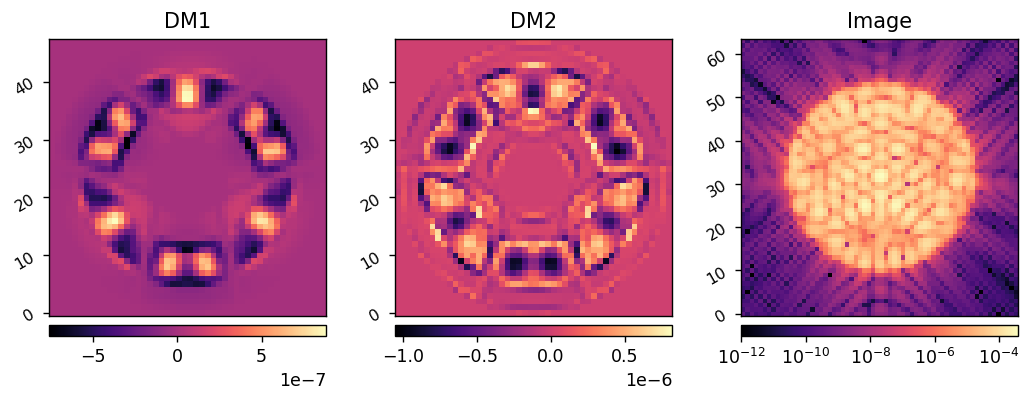

	Running iteration 15/20.


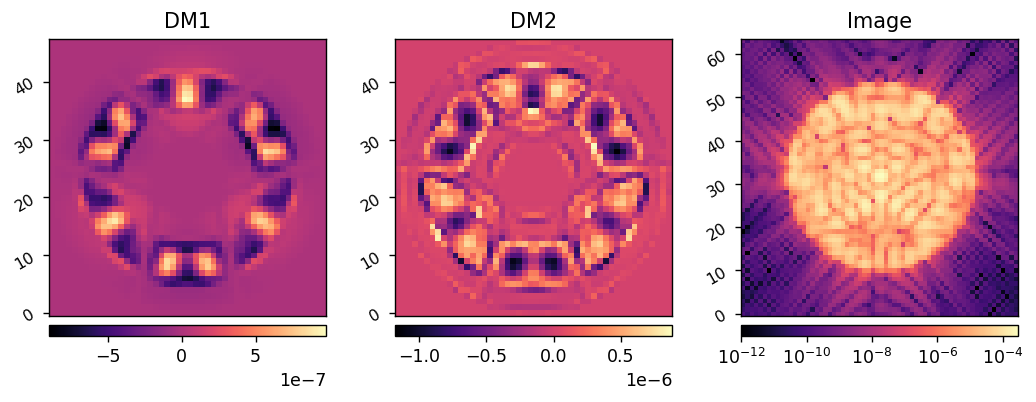

	Running iteration 16/20.


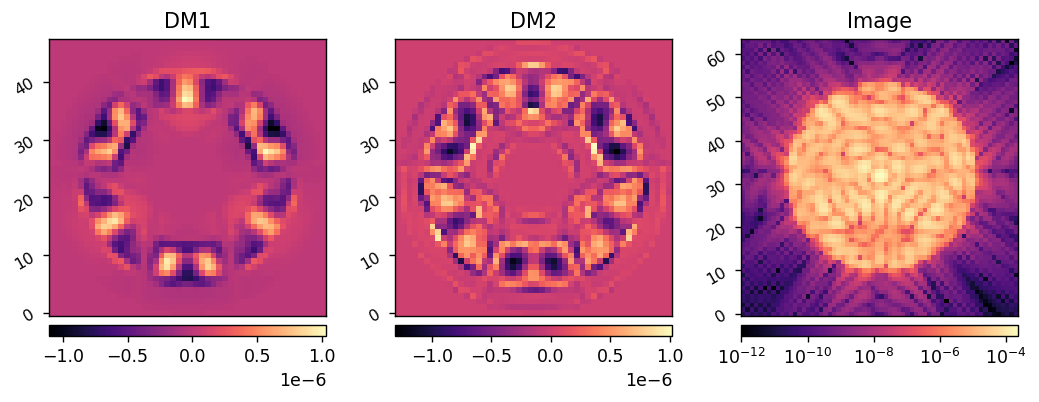

	Running iteration 17/20.


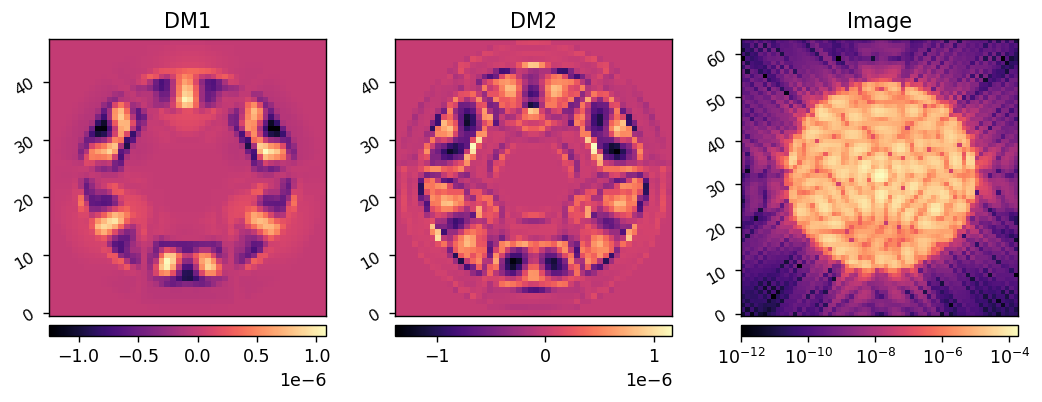

	Running iteration 18/20.


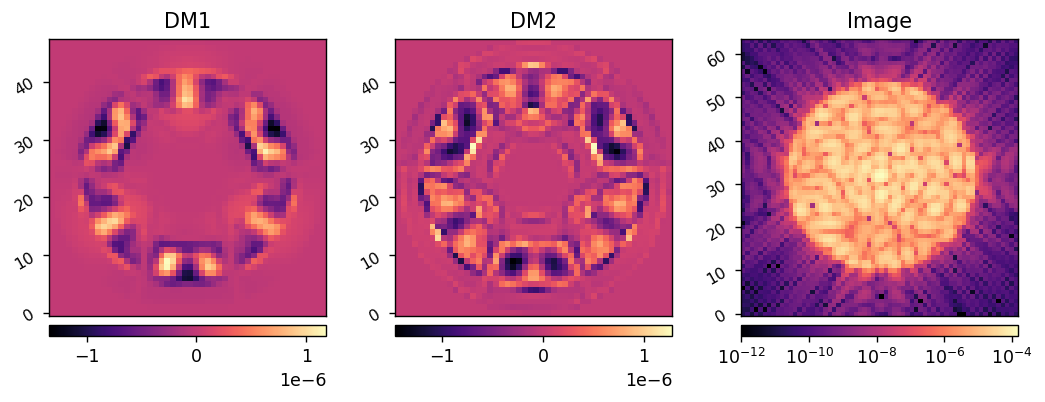

	Running iteration 19/20.


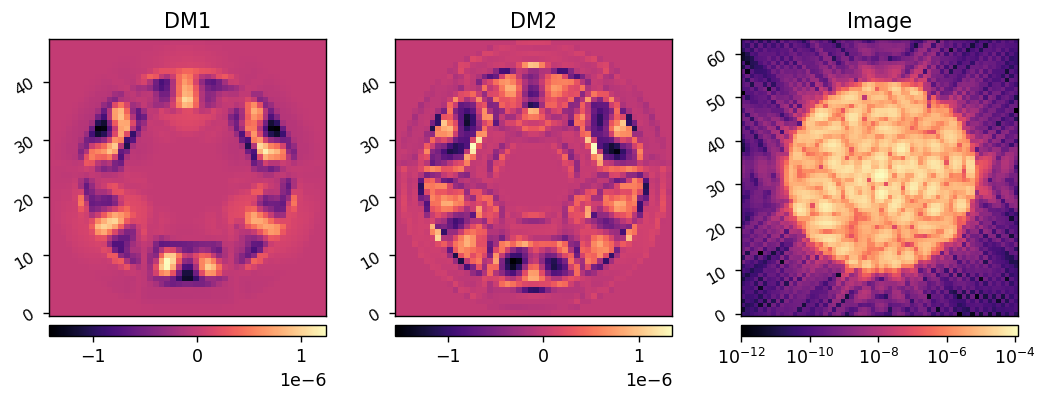

	Running iteration 20/20.


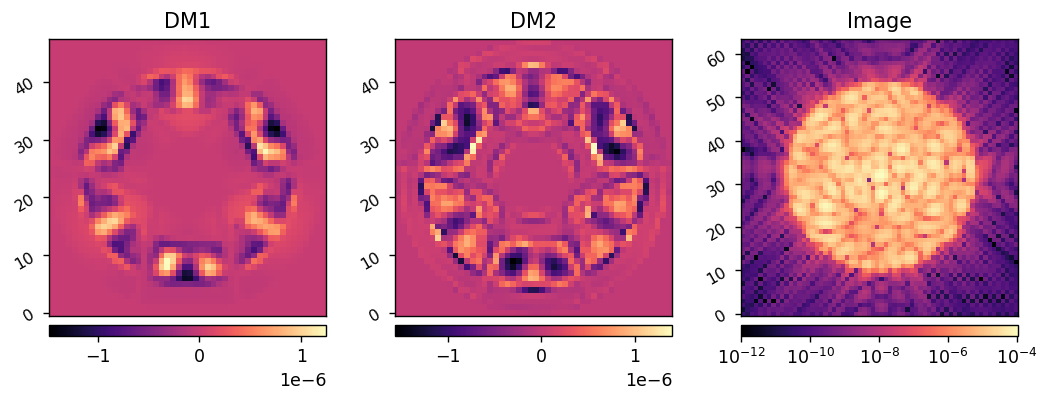

EFC completed in 15.463 sec.


In [57]:
reload(efc)
hlc.reset_dms()
dm1_commands1, dm2_commands1, efields1 = efc.run_efc_perfect(hlc, efc_matrix, dh_mask, iterations=20, display=True)

# Run EFC with PWP

In [39]:
reload(efc)
hlc.reset_dms()
commands2, efields2, images2 = efc.run_efc_pwp(hlc, efc_matrix, jac, probes, dh_mask, iterations=10, display=False)

Beginning closed-loop EFC simulation.
	Running iteration 1/10.
	Running iteration 2/10.
	Running iteration 3/10.
	Running iteration 4/10.
	Running iteration 5/10.
	Running iteration 6/10.
	Running iteration 7/10.
	Running iteration 8/10.
	Running iteration 9/10.
	Running iteration 10/10.
EFC completed in 16.262 sec.
